In [4]:
%matplotlib inline
from pycocotools.coco import COCO
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
import pylab
pylab.rcParams['figure.figsize'] = (10.0, 8.0)

In [5]:
# !wget http://msvocds.blob.core.windows.net/annotations-1-0-3/instances_train-val2014.zip

In [6]:
cd ../../coco/PythonAPI/

/Users/dorislee/Desktop/Fall2016/Research/seg/coco/PythonAPI


In [7]:
dataDir='../../coco/'
dataType='train2014'
annFile='%s/annotations/instances_%s.json'%(dataDir,dataType)

In [8]:
# initialize COCO api for instance annotations
coco=COCO(annFile)

loading annotations into memory...
Done (t=16.31s)
creating index...
index created!


In [9]:
coco.getImgIds?

In [10]:
# get all images containing given categories, select one at random
catIds = coco.getCatIds(catNms=['person','dog','skateboard']);
imgIds = coco.getImgIds(catIds=catIds );
img = coco.loadImgs(imgIds[np.random.randint(0,len(imgIds))])[0]

In [11]:
catIds

[1, 18, 41]

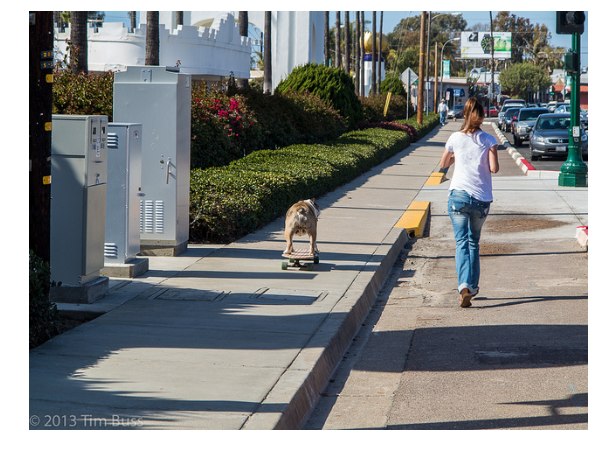

In [22]:
# load and display image
# I = io.imread('%s/images/%s/%s'%(dataDir,dataType,img['file_name']))
# use url to load image
I = io.imread('http://mscoco.org/images/%d'%(img['id']))
plt.figure(); plt.axis('off')
plt.imshow(I)
plt.show()

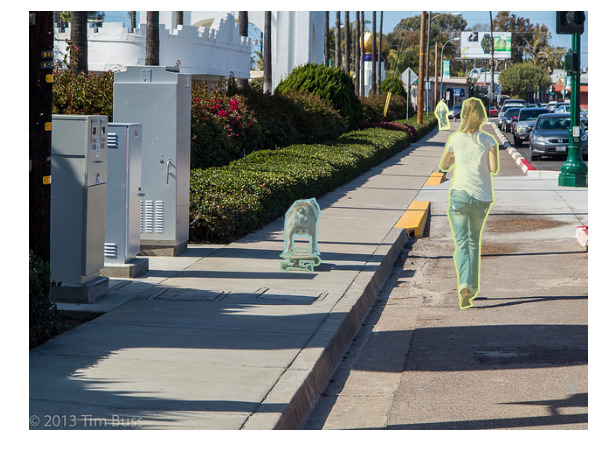

In [23]:
# load and display instance annotations
plt.imshow(I); plt.axis('off')
annIds = coco.getAnnIds(imgIds=img['id'], catIds=catIds, iscrowd=None)
anns = coco.loadAnns(annIds)
coco.showAnns(anns)

In [29]:
# initialize COCO api for person keypoints annotations
annFile = '%s/annotations/person_keypoints_%s.json'%(dataDir,dataType)
coco_kps=COCO(annFile)

loading annotations into memory...
Done (t=9.63s)
creating index...
index created!


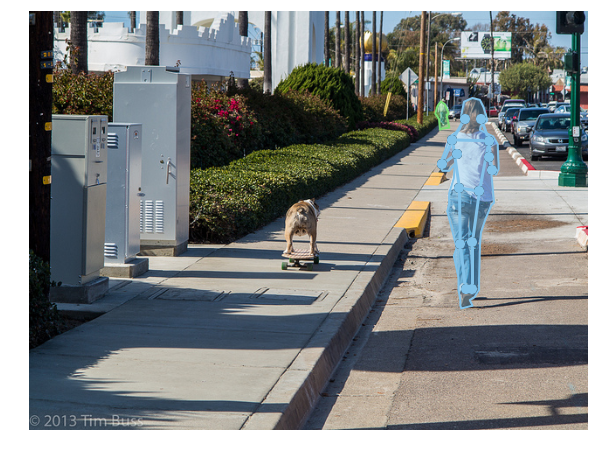

In [31]:
# load and display keypoints annotations
plt.imshow(I); plt.axis('off')
ax = plt.gca()
annIds = coco_kps.getAnnIds(imgIds=img['id'], catIds=catIds, iscrowd=None)
anns = coco_kps.loadAnns(annIds)
coco_kps.showAnns(anns)

In [26]:
# wget http://msvocds.blob.core.windows.net/annotations-1-0-3/person_keypoints_trainval2014.zip
# wget http://msvocds.blob.core.windows.net/annotations-1-0-3/captions_train-val2014.zip

In [27]:
# initialize COCO api for caption annotations
annFile = '%s/annotations/captions_%s.json'%(dataDir,dataType)
coco_caps=COCO(annFile)

loading annotations into memory...
Done (t=2.01s)
creating index...
index created!


A lady running by a dog on a skate board.
A girl is running next to a dog on skateboard.
A woman is running along a sidewalk while a dog is on top of a skateboard.
Dog skateboarding on a city street next to a woman
A woman walking down a street with a dog on a skateboard.


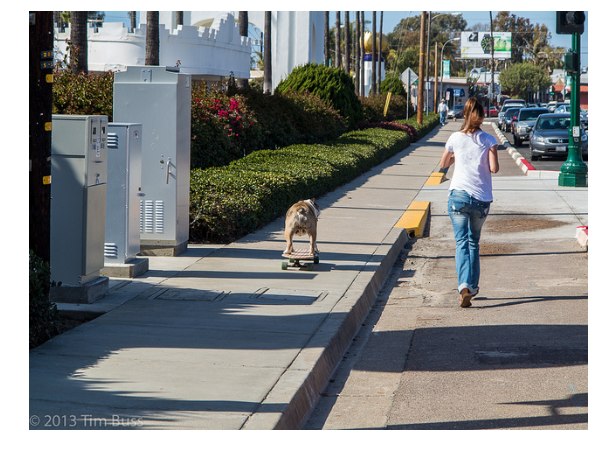

In [32]:
# load and display caption annotations
annIds = coco_caps.getAnnIds(imgIds=img['id']);
anns = coco_caps.loadAnns(annIds)
coco_caps.showAnns(anns)
plt.imshow(I); plt.axis('off')
plt.show()